In [1]:
import sys
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import datetime

sys.path.append("../src/")
from fLe_twobath_ftd import fle_twobath
import fBm_stats as fbs
import mittag_leffler as ml

In [2]:
DATA_PATH = "data/two_baths/"

In [3]:
T = 20
h = 0.05
realizations = 2000

In [4]:
def msd_analytical_colored(fle):
    
    H = fle.H
    
    eta_H = fle.eta_H
    M = fle.M
    kBT = fle.kBT
    t = fle.t
    
    order = 2 - 2*H
    #*gamma(1-order)
    z = -(eta_H/M)*t**(2-order)
    return 2*kBT/(M) * (t**2) * ml.mittag_leffler_vector(z, 2-order, 3)

In [5]:
def msd(H, T, M, eta_H, eta_12, theta_12, theta_H,
        realizations = 100, h = 0.01):
    for r in tqdm(range(realizations)):
        eq = fle_twobath(H)
        eq.params(T, h, v0 = 0, 
                  M = M, eta_H = eta_H, eta_12 = eta_12, 
                  theta_12 = theta_12, theta_H = theta_H)
        eq.make_B_H()
        eq.solve()        
        if r == 0:
            df_msd = pd.DataFrame({"t": eq.t})
        df_msd["x_"+str(r)] = eq.numerical        
    df_msd.set_index("t", inplace = True)
    msd = fbs.msd(df_msd, False)
    return msd

100%|██████████| 2000/2000 [01:00<00:00, 33.12it/s]


<Axes: xlabel='t'>

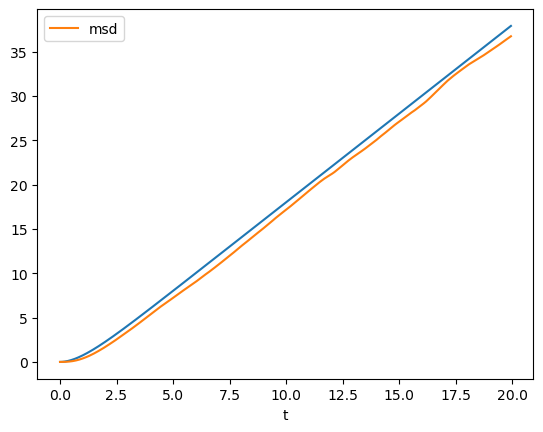

In [6]:
H = 0.50001
M = 1
eta_H = 1#float(sys.argv[3])
eta_12 = 0#float(sys.argv[4])
theta_12 = 0#float(sys.argv[5])
theta_H = 1#float(sys.argv[6])

t = datetime.datetime.now()

# Mean squarred displacement
eq = fle_twobath(H)
eq.params(T, h, v0 = 0, 
    M = M, eta_H = eta_H, eta_12 = eta_12, 
    theta_12 = theta_12, theta_H = theta_H)
eq.make_B_H()
anl = msd_analytical_colored(eq)

df_msd = pd.DataFrame(msd(H = H, T = T, 
                          M = M, eta_H = eta_H, eta_12 = eta_12, 
                          theta_12 = theta_12, theta_H = theta_H,
                          realizations = realizations, h = h), columns=["msd"])

fig, ax = plt.subplots()
ax.plot(eq.t, anl)
df_msd.plot(ax = ax)

100%|██████████| 2000/2000 [00:59<00:00, 33.77it/s]


<Axes: xlabel='t'>

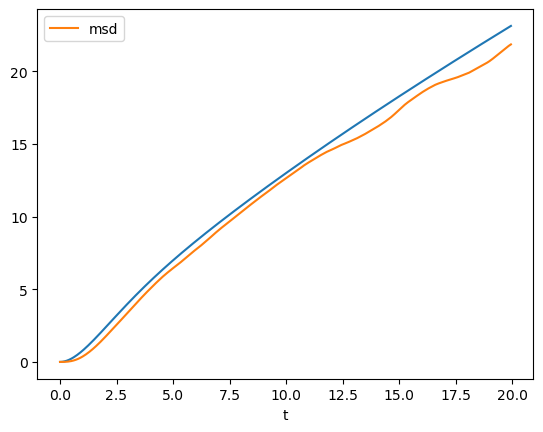

In [7]:
H = 0.6
M = 1
eta_H = 1#float(sys.argv[3])
eta_12 = 0#float(sys.argv[4])
theta_12 = 0#float(sys.argv[5])
theta_H = 1#float(sys.argv[6])

t = datetime.datetime.now()

# Mean squarred displacement
eq = fle_twobath(H)
eq.params(T, h, v0 = 0, 
    M = M, eta_H = eta_H, eta_12 = eta_12, 
    theta_12 = theta_12, theta_H = theta_H)
eq.make_B_H()
anl = msd_analytical_colored(eq)

df_msd = pd.DataFrame(msd(H = H, T = T, 
                          M = M, eta_H = eta_H, eta_12 = eta_12, 
                          theta_12 = theta_12, theta_H = theta_H,
                          realizations = realizations, h = h), columns=["msd"])

fig, ax = plt.subplots()
ax.plot(eq.t, anl)
df_msd.plot(ax = ax)

100%|██████████| 2000/2000 [00:56<00:00, 35.43it/s]


<Axes: xlabel='t'>

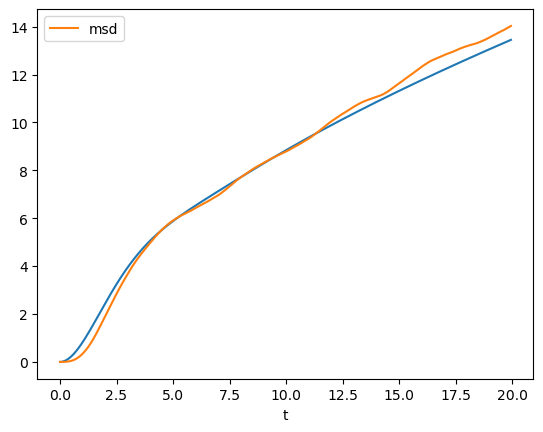

In [8]:
H = 0.7
M = 1
eta_H = 1#float(sys.argv[3])
eta_12 = 0#float(sys.argv[4])
theta_12 = 0#float(sys.argv[5])
theta_H = 1#float(sys.argv[6])

t = datetime.datetime.now()

# Mean squarred displacement
eq = fle_twobath(H)
eq.params(T, h, v0 = 0, 
    M = M, eta_H = eta_H, eta_12 = eta_12, 
    theta_12 = theta_12, theta_H = theta_H)
eq.make_B_H()
anl = msd_analytical_colored(eq)

df_msd = pd.DataFrame(msd(H = H, T = T, 
                          M = M, eta_H = eta_H, eta_12 = eta_12, 
                          theta_12 = theta_12, theta_H = theta_H,
                          realizations = realizations, h = h), columns=["msd"])

fig, ax = plt.subplots()
ax.plot(eq.t, anl)
df_msd.plot(ax = ax)

100%|██████████| 2000/2000 [00:55<00:00, 36.03it/s]


<Axes: xlabel='t'>

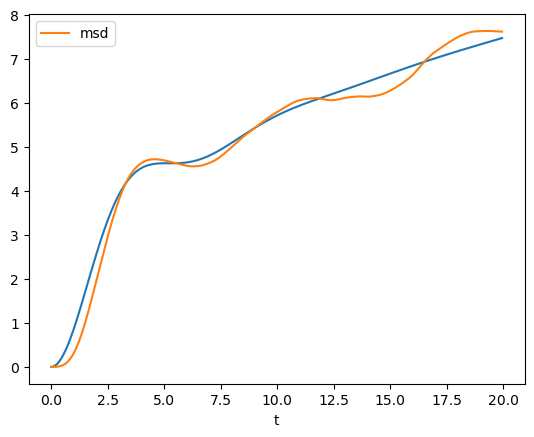

In [9]:
H = 0.8
M = 1
eta_H = 1#float(sys.argv[3])
eta_12 = 0#float(sys.argv[4])
theta_12 = 0#float(sys.argv[5])
theta_H = 1#float(sys.argv[6])

t = datetime.datetime.now()

# Mean squarred displacement
eq = fle_twobath(H)
eq.params(T, h, v0 = 0, 
    M = M, eta_H = eta_H, eta_12 = eta_12, 
    theta_12 = theta_12, theta_H = theta_H)
eq.make_B_H()
anl = msd_analytical_colored(eq)

df_msd = pd.DataFrame(msd(H = H, T = T, 
                          M = M, eta_H = eta_H, eta_12 = eta_12, 
                          theta_12 = theta_12, theta_H = theta_H,
                          realizations = realizations, h = h), columns=["msd"])

fig, ax = plt.subplots()
ax.plot(eq.t, anl)
df_msd.plot(ax = ax)

  3%|▎         | 58/2000 [00:04<02:40, 12.13it/s]

100%|██████████| 2000/2000 [02:25<00:00, 13.73it/s]


<Axes: xlabel='t'>

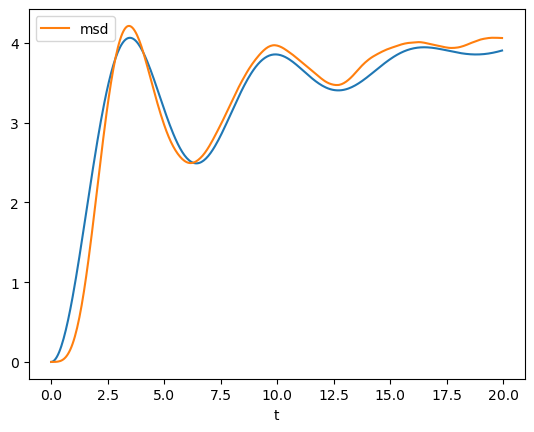

In [10]:
H = 0.9
M = 1
eta_H = 1#float(sys.argv[3])
eta_12 = 0#float(sys.argv[4])
theta_12 = 0#float(sys.argv[5])
theta_H = 1#float(sys.argv[6])

t = datetime.datetime.now()

# Mean squarred displacement
eq = fle_twobath(H)
eq.params(T, h, v0 = 0, 
    M = M, eta_H = eta_H, eta_12 = eta_12, 
    theta_12 = theta_12, theta_H = theta_H)
eq.make_B_H()
anl = msd_analytical_colored(eq)

df_msd = pd.DataFrame(msd(H = H, T = T, 
                          M = M, eta_H = eta_H, eta_12 = eta_12, 
                          theta_12 = theta_12, theta_H = theta_H,
                          realizations = realizations, h = h), columns=["msd"])

fig, ax = plt.subplots()
ax.plot(eq.t, anl)
df_msd.plot(ax = ax)